- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 - Data is given as a csv file and importing into python environment.

In [2]:
Students=pd.read_csv(r'C:\Users\GOKUL BABU K\Downloads\StudentsPerformance.csv')

- checking data is imported to Python environment by printing the data.

In [5]:
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

- Grouping the gender column by male and female and finding the size of the group

In [7]:
Students.groupby("gender").size()

gender
female    518
male      482
dtype: int64

- insight: Females participation is more in the test than male

# 2. What do you think about the students' parental level of education?

- plotting the parental level of education data for getting an overviw about the data

Text(0.5, 1.0, 'parental level of education count')

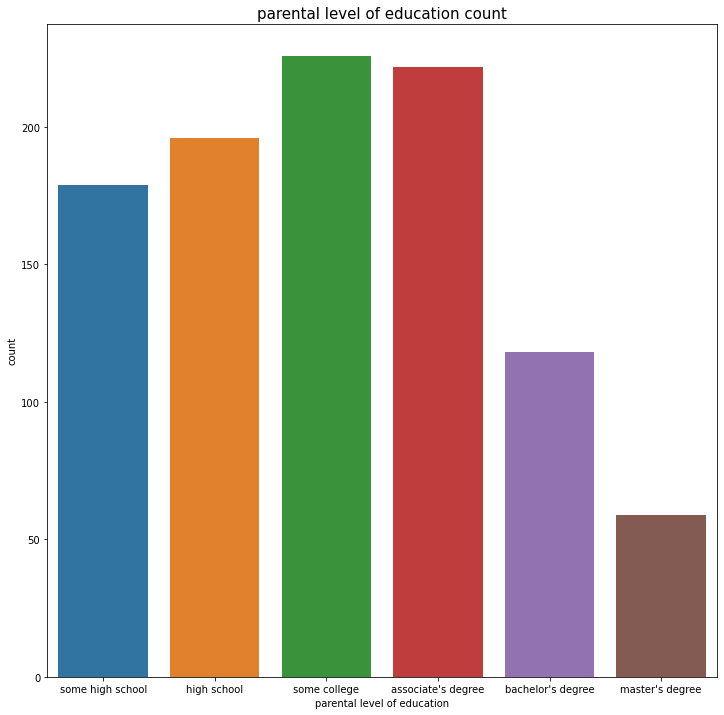

In [26]:
plt.figure(figsize=(12,12))
sns.countplot(x ='parental level of education', data = Students)
plt.title('parental level of education count',size=15)


- Grouping the parental level of education data and finding the average marks in each group. Then we will get to know which category of students having highest average.

In [12]:
mean_maths = Students.groupby("parental level of education")["math score"].mean().reset_index()

- Sorting the values in descending order

In [15]:
mean_maths.sort_values("math score",ascending=False)

,parental level of education,math score
3,master's degree,70.254237
1,bachelor's degree,69.288136
0,associate's degree,67.977477
4,some college,67.128319
5,some high school,63.134078
2,high school,61.821429


- Insight : Students who are having highest level of parental education, scores more in maths. 

In [75]:
#Finding the mean groupwise and sorting in descending order.
mean_reading = Students.groupby("parental level of education")["reading score"].mean().reset_index()
mean_reading.sort_values("reading score",ascending=False)

,parental level of education,reading score
3,master's degree,75.949153
1,bachelor's degree,73.000000
0,associate's degree,71.018018
4,some college,69.566372
5,some high school,66.759777
2,high school,64.602041


- Insight: Same trend follows for reading also, Students who are having highest level of parental education, scores more

In [76]:
#Finding the mean groupwise and sorting in descending order.
mean_writing = Students.groupby("parental level of education")["writing score"].mean().reset_index()
mean_writing.sort_values("writing score",ascending=False)

,parental level of education,writing score
3,master's degree,75.677966
1,bachelor's degree,73.381356
0,associate's degree,70.031532
4,some college,69.035398
5,some high school,64.888268
2,high school,62.403061


- Verdict : Students who are having highest level of parental education, scores more.

# 3. Who scores the most on average for math, reading and writing based on

# a) Gender

- Maths Score

In [77]:
#Finding the mean groupwise and sorting in descending order.
mean_maths_gender = Students.groupby("gender")["math score"].mean().reset_index()
mean_maths_gender.sort_values("math score",ascending=False)

,gender,math score
1,male,68.821577
0,female,63.376448


- Reading Score

In [78]:
#Finding the mean groupwise and sorting in descending order.
mean_reading_gender = Students.groupby("gender")["reading score"].mean().reset_index()
mean_reading_gender.sort_values("reading score",ascending=False)

,gender,reading score
0,female,72.590734
1,male,65.545643


- Writing Score 

In [79]:
#Finding the mean groupwise and sorting in descending order.
mean_writing_gender = Students.groupby("gender")["writing score"].mean().reset_index()
mean_writing_gender.sort_values("writing score",ascending=False)

,gender,writing score
0,female,72.467181
1,male,63.446058


- Insight : Male scored more in maths and Female are better in reading and wrting skills.

# b) Test preparation course

- Dividing the obtained marks into two groups and finding average marks and comparing the difference.

In [59]:
#Find the mean of obtained marks on the basis of test preparation.
Students.groupby("test preparation course")[["math score","reading score","writing score"]].mean().reset_index()

,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


- Insight : There is significant difference in marks between those who are completed the preperation and those who are not

# 4. What do you think about the scoring variation for math, reading and writing based on

# a) Gender

In [58]:
#Find the standard deviation of the marks on the basis of gender
Students.groupby("gender")[["math score","reading score","writing score"]].std().reset_index()

,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


- Insight : Males are more consistant scoring, with less standard deviation on all the subjects.

# b) Test preparation course

In [62]:
#Find the standard deviation of the marks on the basis of test preperation
Students.groupby("test preparation course")[["math score","reading score","writing score"]].std().reset_index()

,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


- Those who are completed the preperation is consistant in scoring marks.

# 5. The management needs your help to give bonus points to the top 25% ofstudents based on their maths score, so how will you help the management to achieve this.

- Find the 75 percentile of the mark from the given dataset and identify the students who scored more than 75 percentile

In [65]:
#seperating the math score from the whole data
math_score = Students["math score"]

In [66]:
math_score

0        0
1        8
2       18
3       11
4       22
      ... 
995     99
996    100
997    100
998    100
999    100
Name: math score, Length: 1000, dtype: int64

In [70]:
#find 75 percentile using percentile function
print(np.percentile(math_score, 75))

77.0


In [72]:
#Seperating total number of students who scored more than 25 percentile.
Total_number = math_score[math_score>=77]

In [74]:
Total_number.count()

255

- Verdict : Total 255 students are eligible for bonus.